In [44]:
!pip3 install beautifulsoup4
!pip3 install requests
!pip3 install lxml
!pip3 install matplotlib
!pip3 install numpy

In [76]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

from bs4 import BeautifulSoup
import requests
from datetime import datetime
import pymysql
plt.rcParams['figure.figsize'] = [15, 10]


In [77]:
db = pymysql.connect(host='localhost',
                             user='root',
                             password='',
                             db='db',
                             charset='utf8mb4',
                             cursorclass=pymysql.cursors.DictCursor)
cursor = db.cursor()


In [78]:
cursor.execute("""select * from allergens""")
print(cursor.fetchall())

[{'allergen_id': 1, 'allergen_type': 'TREE', 'allergen_name': 'maple', 'count': 0, 'created_date': datetime.datetime(2018, 5, 14, 18, 56, 20)}, {'allergen_id': 2, 'allergen_type': 'TREE', 'allergen_name': 'mulberry', 'count': 0, 'created_date': datetime.datetime(2018, 5, 14, 18, 56, 20)}, {'allergen_id': 3, 'allergen_type': 'TREE', 'allergen_name': 'alder', 'count': 0, 'created_date': datetime.datetime(2018, 5, 14, 18, 56, 20)}, {'allergen_id': 4, 'allergen_type': 'TREE', 'allergen_name': 'pine', 'count': 0, 'created_date': datetime.datetime(2018, 5, 14, 18, 56, 20)}, {'allergen_id': 5, 'allergen_type': 'TREE', 'allergen_name': 'birch', 'count': 0, 'created_date': datetime.datetime(2018, 5, 14, 18, 56, 20)}, {'allergen_id': 6, 'allergen_type': 'TREE', 'allergen_name': 'sycamore', 'count': 0, 'created_date': datetime.datetime(2018, 5, 14, 18, 56, 20)}, {'allergen_id': 7, 'allergen_type': 'TREE', 'allergen_name': 'hickory,', 'count': 4, 'created_date': datetime.datetime(2018, 5, 14, 18, 

In [79]:
cursor.execute("""select * from allergens WHERE created_date BETWEEN DATE(NOW() - INTERVAL 1 DAY) AND DATE(NOW())""")
results5=cursor.fetchall()
cursor.execute("""select * from allergens WHERE created_date BETWEEN DATE(NOW() - INTERVAL 2 DAY) AND DATE(NOW() - INTERVAL 1 DAY)""")
results4=cursor.fetchall()
cursor.execute("""select * from allergens WHERE created_date BETWEEN DATE(NOW() - INTERVAL 3 DAY) AND DATE(NOW() - INTERVAL 2 DAY)""")
results3=cursor.fetchall()
cursor.execute("""select * from allergens WHERE created_date BETWEEN DATE(NOW() - INTERVAL 4 DAY) AND DATE(NOW() - INTERVAL 3 DAY)""")
results2=cursor.fetchall()
cursor.execute("""select * from allergens WHERE created_date BETWEEN DATE(NOW() - INTERVAL 5 DAY) AND DATE(NOW() - INTERVAL 4 DAY)""")
results1=cursor.fetchall()

In [80]:
#allergen_name= 'Ascopores'
allergen_name= 'cladosporium'
cursor.execute("""select * from allergens WHERE allergen_name = '%s' ORDER BY created_date"""%allergen_name)
results=cursor.fetchall()
results

[{'allergen_id': 40,
  'allergen_type': 'MOLD',
  'allergen_name': 'cladosporium',
  'count': 2253,
  'created_date': datetime.datetime(2018, 5, 14, 18, 56, 20)},
 {'allergen_id': 89,
  'allergen_type': 'MOLD',
  'allergen_name': 'cladosporium',
  'count': 4197,
  'created_date': datetime.datetime(2018, 5, 15, 18, 56, 20)},
 {'allergen_id': 138,
  'allergen_type': 'MOLD',
  'allergen_name': 'cladosporium',
  'count': 4446,
  'created_date': datetime.datetime(2018, 5, 16, 18, 56, 20)},
 {'allergen_id': 187,
  'allergen_type': 'MOLD',
  'allergen_name': 'cladosporium',
  'count': 4793,
  'created_date': datetime.datetime(2018, 5, 17, 18, 56, 20)},
 {'allergen_id': 236,
  'allergen_type': 'MOLD',
  'allergen_name': 'cladosporium',
  'count': 5431,
  'created_date': datetime.datetime(2018, 5, 18, 18, 56, 20)}]

In [81]:
day=np.arange(5)
results2=np.zeros(5)
results2
for i in range(len(results)):
   results2[i]=results[i]['count']

In [82]:
results2

array([2253., 4197., 4446., 4793., 5431.])

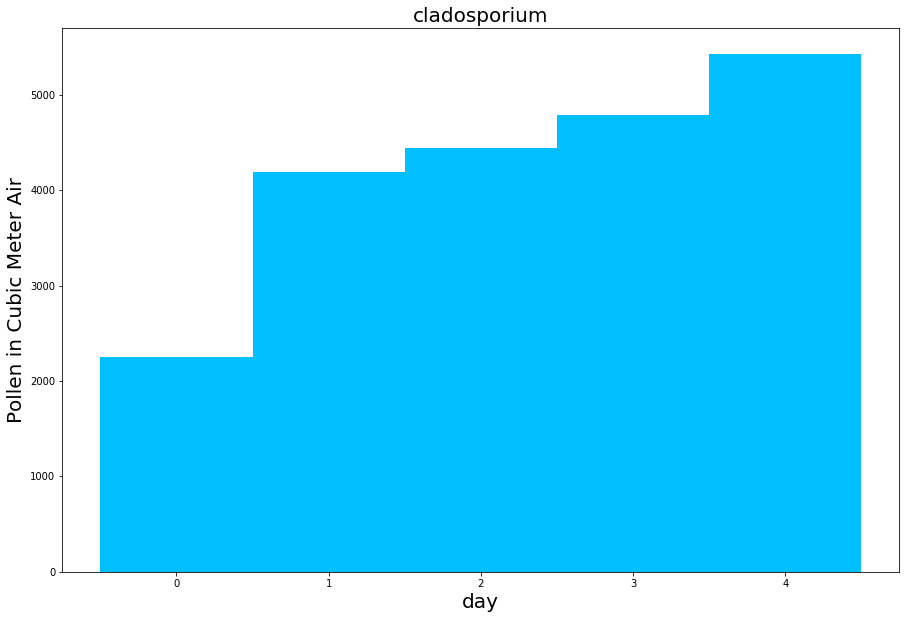

In [83]:
#plt.cla()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(day, results2, 1.0, color='deepskyblue')
ax.set_xlabel('day',fontsize = 20)
ax.set_ylabel('Pollen in Cubic Meter Air',fontsize = 20)
ax.set_title(allergen_name,fontsize = 20)
plt.show()



In [84]:
db.close()